In [2]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [3]:

# Load the data_filledset
from credit_scoring_model_development import load_dataset


# Load the dataset
file_path = r'C:\Users\Naim\credit-scoring-model-development\data\data.csv'
data = load_dataset(file_path)

In [4]:
from EDA import fill_outliers
# Columns to fill outliers for
columns_to_fill = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']

# Fill outliers in the specified columns
data_filled = fill_outliers(data, columns=columns_to_fill)

# Check the changes in the data_filledset
print("data_filledset after filling outliers:")
print(data_filled[columns_to_fill].describe())

Column 'Amount': Outliers filled using capping method with lower bound = -4325.00 and upper bound = 7075.00.
Column 'Value': Outliers filled using capping method with lower bound = -6812.50 and upper bound = 12087.50.
Column 'PricingStrategy': Outliers filled using capping method with lower bound = 2.00 and upper bound = 2.00.
Column 'FraudResult': Outliers filled using capping method with lower bound = 0.00 and upper bound = 0.00.
data_filledset after filling outliers:
             Amount         Value  PricingStrategy  FraudResult
count  95662.000000  95662.000000          95662.0      95662.0
mean    1449.051201   3403.667282              2.0          0.0
std     3210.808287   4168.243292              0.0          0.0
min    -4325.000000      2.000000              2.0          0.0
25%      -50.000000    275.000000              2.0          0.0
50%     1000.000000   1000.000000              2.0          0.0
75%     2800.000000   5000.000000              2.0          0.0
max     7075.

# Create Aggregate Features

In [5]:
from credit_scoring_model_development import create_advanced_aggregate_features
customer_advanced_features = create_advanced_aggregate_features(data_filled)

# Display the first few rows of the aggregated feature set
print("Customer Advanced Aggregate Features:")
print(customer_advanced_features.head())

Advanced aggregate features created successfully for each customer.
Customer Advanced Aggregate Features:
        CustomerId  Total_Transaction_Amount  Average_Transaction_Amount  \
0     CustomerId_1                   -4325.0                -4325.000000   
1    CustomerId_10                   -4325.0                -4325.000000   
2  CustomerId_1001                   14825.0                 2965.000000   
3  CustomerId_1002                    4225.0                  384.090909   
4  CustomerId_1003                   14825.0                 2470.833333   

   Transaction_Count  Std_Dev_Transaction_Amount  Max_Transaction_Amount  \
0                  1                    0.000000                 -4325.0   
1                  1                    0.000000                 -4325.0   
2                  5                 5048.285600                  7075.0   
3                 11                  560.498966                  1500.0   
4                  6                 4597.537837         

c:\Users\Naim\credit-scoring-model-development\scripts\credit_scoring_model_development.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregate_features['Std_Dev_Transaction_Amount'].fillna(0, inplace=True)
c:\Users\Naim\credit-scoring-model-development\scripts\credit_scoring_model_development.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

# Extract Features

In [6]:
# Import the function from the script file
from credit_scoring_model_development import extract_datetime_features

# Assuming the data set has already been loaded and is stored in `data_filled`
data_filled = extract_datetime_features(data_filled, timestamp_column='TransactionStartTime')

# Display the first few rows of the data_filledset with new features
print("data_filledset with extracted datetime features:")
print(data_filled[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year', 'Transaction_DayOfWeek', 'Transaction_WeekOfYear']].head())


Datetime features extracted successfully.
data_filledset with extracted datetime features:
       TransactionStartTime  Transaction_Hour  Transaction_Day  \
0 2018-11-15 02:18:49+00:00                 2               15   
1 2018-11-15 02:19:08+00:00                 2               15   
2 2018-11-15 02:44:21+00:00                 2               15   
3 2018-11-15 03:32:55+00:00                 3               15   
4 2018-11-15 03:34:21+00:00                 3               15   

   Transaction_Month  Transaction_Year  Transaction_DayOfWeek  \
0                 11              2018                      3   
1                 11              2018                      3   
2                 11              2018                      3   
3                 11              2018                      3   
4                 11              2018                      3   

   Transaction_WeekOfYear  
0                      46  
1                      46  
2                      46  
3        

In [7]:
print(data_filled.dtypes)

TransactionId                          object
BatchId                                object
AccountId                              object
SubscriptionId                         object
CustomerId                             object
CurrencyCode                           object
CountryCode                             int64
ProviderId                             object
ProductId                              object
ProductCategory                        object
ChannelId                              object
Amount                                float64
Value                                 float64
TransactionStartTime      datetime64[ns, UTC]
PricingStrategy                       float64
FraudResult                           float64
Transaction_Hour                        int32
Transaction_Day                         int32
Transaction_Month                       int32
Transaction_Year                        int32
Transaction_DayOfWeek                   int32
Transaction_WeekOfYear            

In [8]:
# Import the functions from the script file
from credit_scoring_model_development import encode_all_categorical

print("data_filledset before encoding:")
print(data_filled.head())

# Encode all categorical columns
data_filled_encoded = encode_all_categorical(data_filled, max_unique_values=10)

# Display the first few rows of the encoded data_filledset
print("data_filledset after encoding all categorical columns:")
print(data_filled_encoded.head())



data_filledset before encoding:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory  ...    Value 

In [9]:
# Check the data_filled types of all columns
print("data_filled types of columns:")
print(data_filled_encoded.dtypes)

# Identify columns that are still of object type (potentially not encoded)
remaining_categorical_columns = data_filled_encoded.select_dtypes(include='object').columns
print(f"Remaining categorical columns (not encoded): {list(remaining_categorical_columns)}")


data_filled types of columns:
TransactionId                                       int64
BatchId                                             int64
AccountId                                           int64
SubscriptionId                                      int64
CustomerId                                          int64
CountryCode                                         int64
ProductId                                           int64
Amount                                            float64
Value                                             float64
TransactionStartTime                  datetime64[ns, UTC]
PricingStrategy                                   float64
FraudResult                                       float64
Transaction_Hour                                    int32
Transaction_Day                                     int32
Transaction_Month                                   int32
Transaction_Year                                    int32
Transaction_DayOfWeek                     

In [10]:
from credit_scoring_model_development import missing_values_summary
# Check the missing values in the data_filledset
missing_summary = missing_values_summary(data_filled_encoded)
print(missing_summary)

Columns with Missing Values:
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [11]:
# Import the scaling function from the script
from credit_scoring_model_development import scale_numerical_features

# Normalize all numerical columns
data_filled_normalized = scale_numerical_features(data_filled_encoded.copy(), method='normalization')

# Display the first few rows of the normalized data_filledset
print("Normalized data_filledset:")
print(data_filled_normalized.head())


Scaling method: normalization
Columns to scale: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProductId', 'Amount', 'Value', 'PricingStrategy',
       'FraudResult', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year', 'Transaction_DayOfWeek',
       'Transaction_WeekOfYear'],
      dtype='object')
Numerical columns scaled using normalization.
Normalized data_filledset:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       0.816947  0.495528   0.685573        0.974903    0.690724   
1       0.792601  0.334940   0.886289        0.652510    0.690724   
2       0.416972  0.635727   0.746971        0.274683    0.750067   
3       0.509487  0.018954   0.922632        0.268616    0.997862   
4       0.432402  0.516212   0.886289        0.652510    0.997862   

   CountryCode  ProductId    Amount     Value      TransactionStartTime  ...  \
0          0.0   0.045455  0.467105  0.08

In [12]:

# Standardize all numerical columns
data_filled_standardized = scale_numerical_features(data_filled_encoded.copy(), method='standardization')

# Display the first few rows of the standardized data_filledset
print("Standardized data_filledset:")
print(data_filled_standardized.head())


Scaling method: standardization
Columns to scale: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProductId', 'Amount', 'Value', 'PricingStrategy',
       'FraudResult', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year', 'Transaction_DayOfWeek',
       'Transaction_WeekOfYear'],
      dtype='object')
Numerical columns scaled using standardization.
Standardized data_filledset:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       1.097926 -0.015563   0.153713        1.668646    0.595070   
1       1.013589 -0.571733   0.867190        0.346449    0.595070   
2      -0.287613  0.469994   0.371965       -1.203089    0.807169   
3       0.032862 -1.666100   0.996380       -1.227972    1.692827   
4      -0.234164  0.056072   0.867190        0.346449    1.692827   

   CountryCode  ProductId    Amount     Value      TransactionStartTime  ...  \
0          0.0  -1.578054 -0.139857

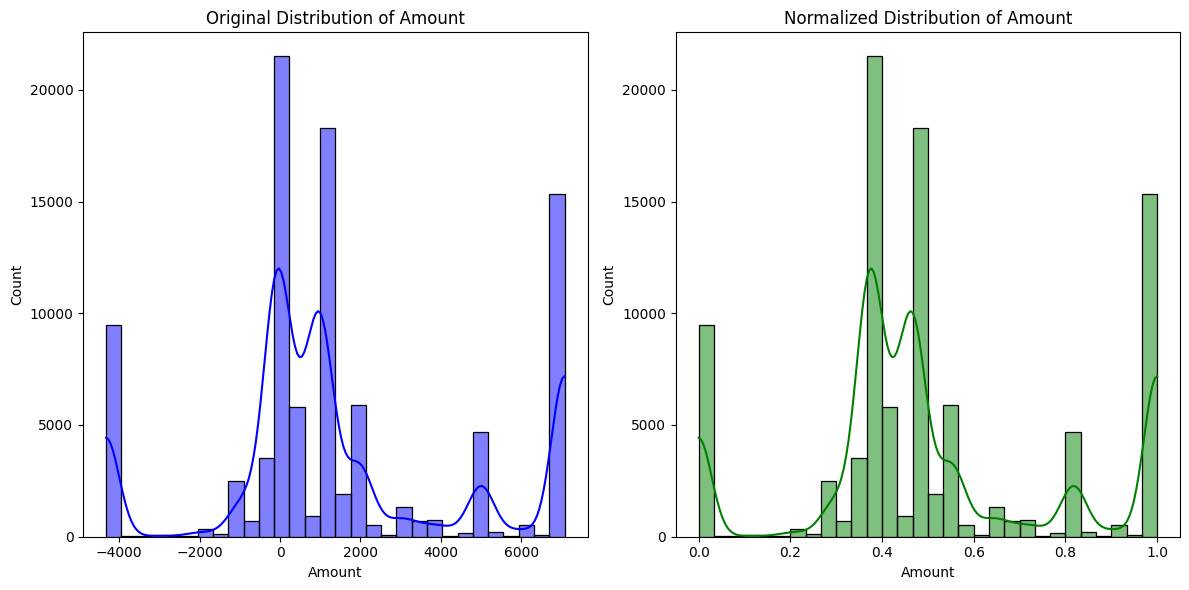

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of a selected feature before and after scaling
feature = 'Amount'
plt.figure(figsize=(12, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(data_filled_encoded[feature], bins=30, kde=True, color='blue')
plt.title(f'Original Distribution of {feature}')

# Normalized Distribution
plt.subplot(1, 2, 2)
sns.histplot(data_filled_normalized[feature], bins=30, kde=True, color='green')
plt.title(f'Normalized Distribution of {feature}')

plt.tight_layout()
plt.show()
